# Telemetry data analisys

### Importing the data

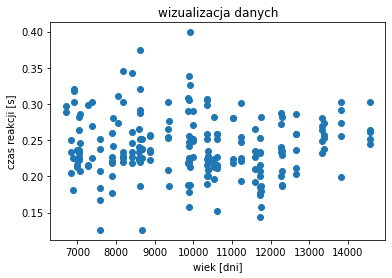

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')
data.columns = ['age_in_days', 'reaction_time_ms']
data = data.sort_values(by = ['age_in_days'])

plt.scatter(data['age_in_days'], data['reaction_time_ms'])
plt.title("wizualizacja danych")
plt.ylabel("czas reakcji [s]")
plt.xlabel("wiek [dni]")
plt.show()


### Pre-processing the data


In [ ]:
# obliczenie sredniej dla kazdego zawodnika w danym meczu

data_averages = data.groupby(['age_in_days']).mean().reset_index()
data_averages_years = data.copy(True)

# obliczenie sredniej dla zawodnikow majacych tyle samo lat

data_averages_years['age_in_days'] = data_averages_years['age_in_days'] // 365
data_averages_years.columns = ['age', 'reaction_time_ms']
data_averages_years = data_averages_years.groupby(['age']).mean().reset_index()

## Linear regression

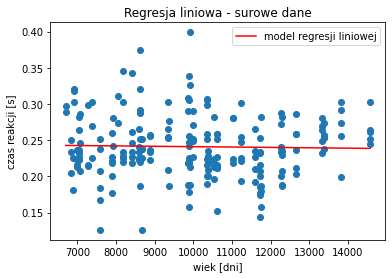

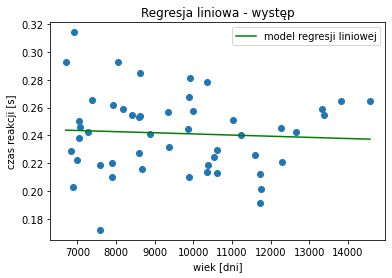

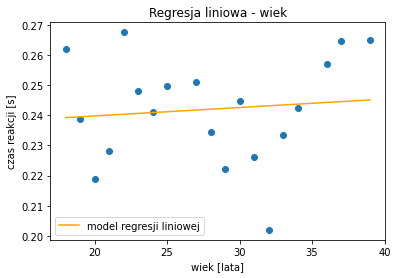

In [ ]:


import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()


#for raw data

X = data['age_in_days'].values[:, np.newaxis]
Y = data['reaction_time_ms'].values

model.fit(X, Y)

plt.scatter(data['age_in_days'], data['reaction_time_ms'])
reg1 , = plt.plot(X, model.predict(X), color = 'Red')
plt.legend([reg1], ['model regresji liniowej'])
plt.title("Regresja liniowa - surowe dane")
plt.ylabel("czas reakcji [s]")
plt.xlabel("wiek [dni]")

plt.show()

# for average reaction time of a rider in a match

X = data_averages['age_in_days'].values[:, np.newaxis]
Y = data_averages['reaction_time_ms'].values

model.fit(X, Y)

plt.scatter(data_averages['age_in_days'], data_averages['reaction_time_ms'])
reg2 , = plt.plot(X, model.predict(X), color = 'Green')
plt.legend([reg2], ['model regresji liniowej'])
plt.title("Regresja liniowa - występ")
plt.ylabel("czas reakcji [s]")
plt.xlabel("wiek [dni]")
plt.show()


# Regression for data grouped by age in years

X = data_averages_years['age'].values[:, np.newaxis]
Y = data_averages_years['reaction_time_ms'].values

model.fit(X,Y)

plt.scatter(data_averages_years['age'], data_averages_years['reaction_time_ms'])
reg3 , = plt.plot(X, model.predict(X), color = 'Orange')
plt.legend([reg3], ['model regresji liniowej'])
plt.title("Regresja liniowa - wiek")
plt.ylabel("czas reakcji [s]")
plt.xlabel("wiek [lata]")

plt.show()






## Polynomial regression

[0.297 0.289 0.204 0.25  0.233 0.225 0.181 0.303 0.318 0.321 0.213 0.237
 0.223 0.216 0.232 0.237 0.282 0.223 0.264 0.227 0.207 0.286 0.246 0.299
 0.214 0.215 0.225 0.302 0.27  0.251 0.168 0.238 0.207 0.184 0.126 0.218
 0.177 0.227 0.26  0.221 0.2   0.242 0.281 0.311 0.274 0.303 0.22  0.228
 0.233 0.346 0.225 0.246 0.233 0.343 0.227 0.218 0.261 0.223 0.225 0.234
 0.241 0.265 0.374 0.252 0.239 0.22  0.186 0.239 0.32  0.291 0.288 0.238
 0.252 0.225 0.238 0.126 0.256 0.222 0.257 0.237 0.233 0.253 0.255 0.302
 0.209 0.265 0.187 0.276 0.188 0.29  0.308 0.218 0.218 0.157 0.256 0.179
 0.242 0.218 0.339 0.225 0.221 0.305 0.248 0.188 0.213 0.399 0.326 0.271
 0.29  0.252 0.249 0.227 0.189 0.201 0.215 0.251 0.224 0.305 0.258 0.307
 0.298 0.221 0.228 0.235 0.201 0.209 0.213 0.282 0.214 0.196 0.224 0.218
 0.214 0.212 0.212 0.251 0.259 0.258 0.215 0.152 0.227 0.219 0.28  0.224
 0.281 0.301 0.221 0.225 0.248 0.254 0.193 0.235 0.192 0.227 0.266 0.21
 0.2   0.144 0.185 0.253 0.177 0.216 0.174 0.232 0.2

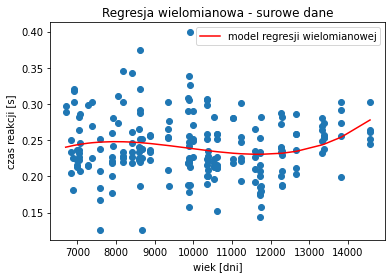

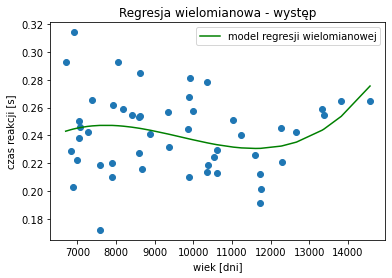

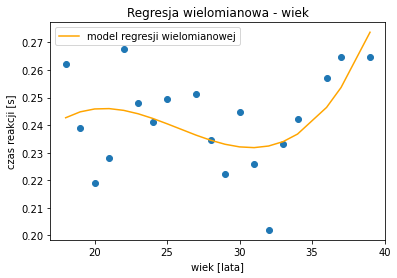

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


#for raw data

X = data['age_in_days'].values[:, np.newaxis]
Y = data['reaction_time_ms'].values

polyreg = make_pipeline(PolynomialFeatures(3), LinearRegression())
polyreg.fit(X, Y)
plt.figure()
plt.scatter(data['age_in_days'], data['reaction_time_ms'])
reg4, = plt.plot(X, polyreg.predict(X), color = 'Red')
plt.legend([reg4], ['model regresji wielomianowej'])
plt.title("Regresja wielomianowa - surowe dane")
plt.ylabel("czas reakcji [s]")
plt.xlabel("wiek [dni]")
plt.show()

# for average reaction time of a rider in a match
X = data_averages['age_in_days'].values[:, np.newaxis]
Y = data_averages['reaction_time_ms'].values

polyreg = make_pipeline(PolynomialFeatures(3), LinearRegression())
polyreg.fit(X, Y)
plt.figure()
plt.scatter(data_averages['age_in_days'], data_averages['reaction_time_ms'])
reg5, = plt.plot(X, polyreg.predict(X), color = 'Green')
plt.legend([reg5], ['model regresji wielomianowej'])
plt.title("Regresja wielomianowa - występ")
plt.ylabel("czas reakcji [s]")
plt.xlabel("wiek [dni]")


plt.show()

# Regression for data grouped by age in years
X = data_averages_years['age'].values[:, np.newaxis]
Y = data_averages_years['reaction_time_ms'].values

polyreg=make_pipeline(PolynomialFeatures(3), LinearRegression())
polyreg.fit(X, Y)
plt.figure()
plt.scatter(data_averages_years['age'], data_averages_years['reaction_time_ms'])
reg6, = plt.plot(X, polyreg.predict(X), color = 'Orange')
plt.legend([reg6], ['model regresji wielomianowej'])
plt.title("Regresja wielomianowa - wiek")
plt.ylabel("czas reakcji [s]")
plt.xlabel("wiek [lata]")

plt.show()







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
